In [2]:
print('Week 9 and 10')

Week 9 and 10


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression (ols)
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
churn_df = pd.read_csv('churn_df.csv',index_col=0)
churn_df.head()

,account_length,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,customer_service_calls,churn
0,101,45.85,17.65,9.64,1.22,3,1
1,73,22.30,9.05,9.98,2.75,2,0
2,86,24.62,17.53,11.49,3.13,4,0
3,59,34.73,21.02,9.66,3.24,1,0
4,129,27.42,18.75,10.11,2.59,1,0


In [5]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

X = churn_df[['total_day_charge','total_eve_charge']].values
#print(X)

y = churn_df['churn'].values
#print(y)

print(X.shape,y.shape)

(3333, 2) (3333,)


In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [7]:
X_new = np.array([
    [56.8,17.5],
    [24.4,24.1],
    [50.1,10.9]
    ])

print(X_new.shape)

(3, 2)


In [8]:
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))

Prediction: [1 0 0]


In [9]:
churn_df.head()

,account_length,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,customer_service_calls,churn
0,101,45.85,17.65,9.64,1.22,3,1
1,73,22.30,9.05,9.98,2.75,2,0
2,86,24.62,17.53,11.49,3.13,4,0
3,59,34.73,21.02,9.66,3.24,1,0
4,129,27.42,18.75,10.11,2.59,1,0


Part - 1
Prediction 

In [10]:
from sklearn.neighbors import KNeighborsClassifier

X = churn_df[['account_length','customer_service_calls']].values
y = churn_df['churn'].values

print(X.shape,y.shape)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X,y)

X_new = np.array([
    [30.0,17.5],
    [107.0,24.1],
    [213.0,10.9]
])

y_pred = knn.predict(X_new)
print(y_pred)

(3333, 2) (3333,)
[0 1 0]


In [11]:
# Accuarcy = correct prediction/ total observation

# This import is for model accuracy(train,test,split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.858


In [12]:
# Larger k = less complex = underfitting
# Smaller k = more complex = overfitting

In [13]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1,26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train,y_train)
    test_accuracies[neighbor] = knn.score(X_test,y_test)

print(train_accuracies.values)
print(test_accuracies.values)

<built-in method values of dict object at 0x134e724c0>
<built-in method values of dict object at 0x1373824c0>


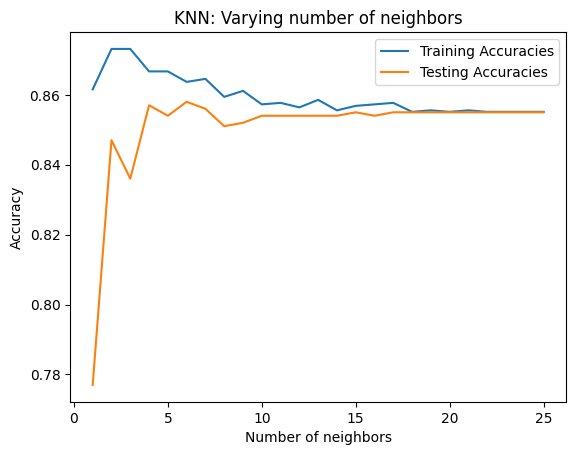

In [14]:
my_train = list(train_accuracies.values())
my_test = list(test_accuracies.values())

plt.Figure
plt.title('KNN: Varying number of neighbors')
plt.plot(neighbors,my_train,label='Training Accuracies')
plt.plot(neighbors, my_test, label='Testing Accuracies')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [15]:
churn_df.head()

,account_length,total_day_charge,total_eve_charge,total_night_charge,total_intl_charge,customer_service_calls,churn
0,101,45.85,17.65,9.64,1.22,3,1
1,73,22.30,9.05,9.98,2.75,2,0
2,86,24.62,17.53,11.49,3.13,4,0
3,59,34.73,21.02,9.66,3.24,1,0
4,129,27.42,18.75,10.11,2.59,1,0


Part 2 - Accuracy

In [16]:
from sklearn.model_selection import train_test_split

#X = churn_df.drop("churn",axis=1).values

X = churn_df[['account_length','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','customer_service_calls']].values
print(X.shape)

y = churn_df['churn'].values
print(y.shape)

(3333, 6)
(3333,)


In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42,stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.863517060367454


Part 3 - Overfitting and underfitting

dict_values([1.0, 0.8873873873873874, 0.8978978978978979, 0.8783783783783784, 0.8813813813813813, 0.8663663663663663, 0.8753753753753754, 0.8663663663663663, 0.8693693693693694, 0.8648648648648649, 0.8708708708708709, 0.8588588588588588])
dict_values([0.8158980127484065, 0.8653918260217472, 0.8537682789651294, 0.86464191976003, 0.863517060367454, 0.8657667791526059, 0.8683914510686164, 0.8616422947131609, 0.8627671541057368, 0.859392575928009, 0.8605174353205849, 0.8601424821897263])


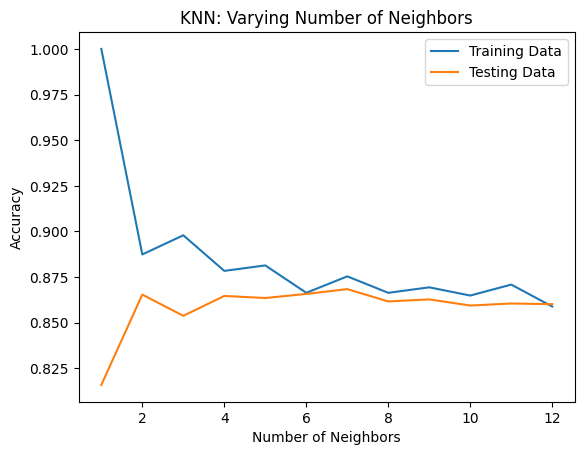

In [18]:
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1,13)
for neighbor in neighbors:
    knn = KNeighborsClassifier(neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train,y_train)
    test_accuracies[neighbor] = knn.score(X_test,y_test)

print(train_accuracies.values())
print(test_accuracies.values())

my_train = list(train_accuracies.values())
my_test = list(test_accuracies.values())

plt.Figure
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors,my_train,label = 'Training Data')
plt.plot(neighbors,my_test,label = 'Testing Data')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

BreakDown of Classification (KNN)

Classification is based on Category data

First step -> Prediction

Second step -> Accuracy

Third step -> OverFitting and UnderFitting

Prediction : Create X, y (Label Data) and create X_new (unlabeled data)| Create Model Neighbor | Fit with X and y | Predict with X_new 

Accuracy : Used train,test,split (X,y,train_size=??(%),random_state=??(num),stratify=y(target label proportion reflects the origianl))

UnderFitting and OverFitting : use specific neighbor of k for each set train and test -> Display

In [19]:
diabetes_df = pd.read_csv('diabetes.csv',index_col=0)
diabetes_df.head()

,pregnancies,glucose,triceps,insulin,bmi,age,diabetes
0,6,148,35,0,33.6,50,1
1,1,85,29,0,26.6,31,0
2,8,183,0,0,23.3,32,1
3,1,89,23,94,28.1,21,0
4,0,137,35,168,43.1,33,1


In [20]:
X = diabetes_df.drop('glucose',axis=1).values
y = diabetes_df['glucose']

print(X.shape)
print(y.shape)

print(type(X),type(y))

(768, 6)
(768,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [21]:
X_bmi = X[:,3]
print(y.shape,X_bmi.shape)

(768,) (768,)


In [22]:
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)

(768, 1)


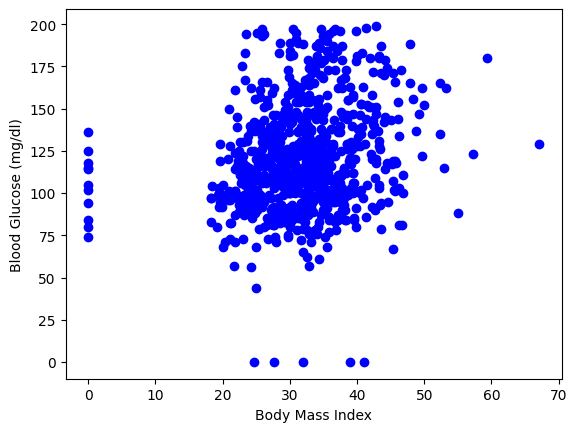

In [23]:
plt.scatter(X_bmi,y,color='blue')
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')
#plt.grid(True)
plt.show()

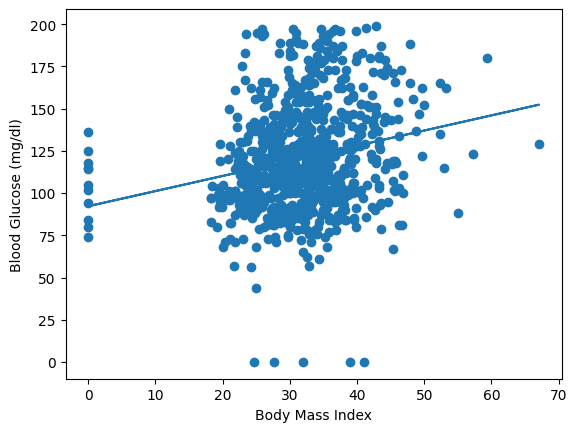

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_bmi,y)
prediction = reg.predict(X_bmi)
plt.scatter(X_bmi,y)
plt.plot(X_bmi,prediction)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')
plt.show()

In [25]:
sales_df = pd.read_csv('sales_df.csv',index_col=0)
sales_df.head()

,tv,radio,social_media,sales
0,16000.0,6566.23,2907.98,54732.76
1,13000.0,9237.76,2409.57,46677.90
2,41000.0,15886.45,2913.41,150177.83
3,83000.0,30020.03,6922.30,298246.34
4,15000.0,8437.41,1406.00,56594.18


In [26]:
X = sales_df['radio'].values
y = sales_df['sales'].values

print(X.shape,y.shape)

(4546,) (4546,)


In [27]:
X = X.reshape(-1,1)
print(X.shape)

(4546, 1)


In [28]:
reg = LinearRegression()

reg.fit(X,y)
predictions = reg.predict(X)

print(predictions[0:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


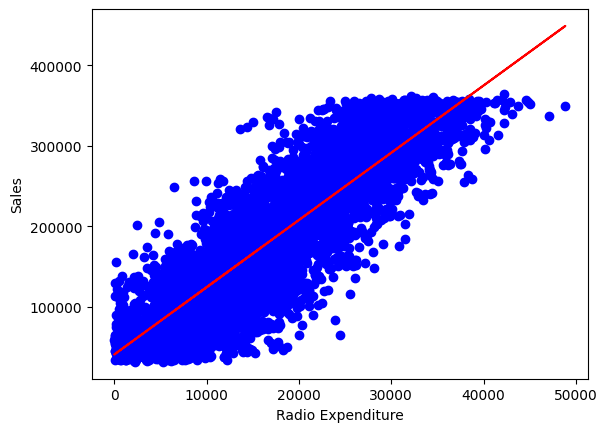

In [29]:
plt.Figure
plt.scatter(x=X,y=y,color='blue')
plt.plot(X,predictions,color='red')
plt.xlabel('Radio Expenditure')
plt.ylabel('Sales')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_pred=reg_all.predict(X_test)

reg_all.score(X_test,y_test)

print(mean_squared_error(y_test,y_pred))


2111207501.1974547


In [31]:
sales_df = pd.read_csv('sales_df.csv')

In [32]:
sales_df.head()

,Unnamed: 0,tv,radio,social_media,sales
0,0,16000.0,6566.23,2907.98,54732.76
1,1,13000.0,9237.76,2409.57,46677.90
2,2,41000.0,15886.45,2913.41,150177.83
3,3,83000.0,30020.03,6922.30,298246.34
4,4,15000.0,8437.41,1406.00,56594.18


In [33]:
X = sales_df.values
y = sales_df['sales'].values

print(X.shape,y.shape)


(4546, 5) (4546,)


In [34]:
X = sales_df.drop("sales",axis=1).values
y = sales_df['sales'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(y_pred)
print(y_test)
print(reg.score(X_test,y_test))
rmse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))
print(rmse)


[ 53099.56399301  71056.14674591 266935.32421767 ...  53199.92554325
 124513.35278121 138769.97278743]
[ 55261.28  67574.9  272250.11 ...  53900.32 127225.8  145708.6 ]
0.9990147957135925
2945.0531856107295
